TASK-1 	Outliers Identification

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [8]:
df = pd.read_csv('toy_dataset.csv')
df

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No
...,...,...,...,...,...,...
149995,149996,Austin,Male,48,93669.0,No
149996,149997,Austin,Male,25,96748.0,No
149997,149998,Austin,Male,26,111885.0,No
149998,149999,Austin,Male,25,111878.0,No


In [9]:

def tukey_outliers(data, threshold = 3):
    mean, std = np.mean(data), np.std(data)
    return data[np.abs((data - mean) / std) > threshold]                                        

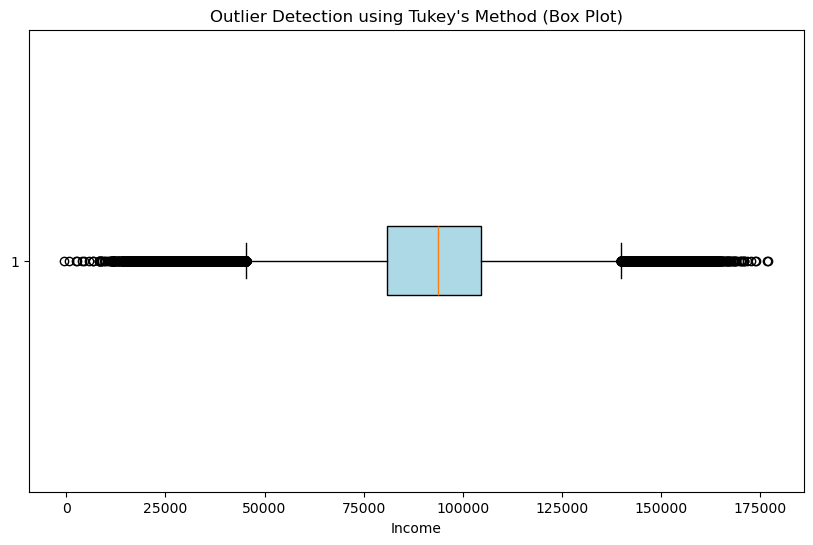

In [10]:
income_outliers = tukey_outliers(df['Income'])
plt.figure(figsize=(10, 6))
plt.boxplot(df['Income'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title("Outlier Detection using Tukey's Method (Box Plot)")
plt.xlabel('Income')
plt.show()

TASK-2 QQ Plot

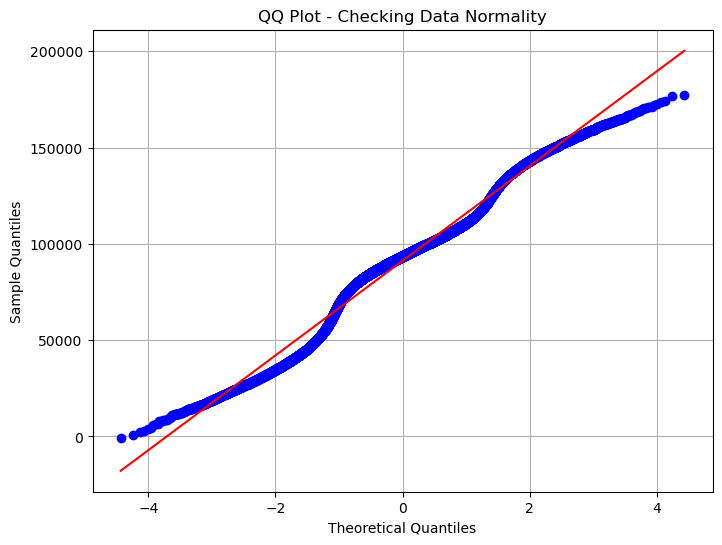

In [11]:
plt.figure(figsize=(8, 6))
stats.probplot(df['Income'], dist="norm", plot=plt)
plt.title('QQ Plot - Checking Data Normality')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid(True)
plt.show()

TASK-3 ANOVA Example

In [19]:
import seaborn as sns
df['City'].value_counts()


City
New York City      50307
Los Angeles        32173
Dallas             19707
Mountain View      14219
Austin             12292
Boston              8301
Washington D.C.     8120
San Diego           4881
Name: count, dtype: int64

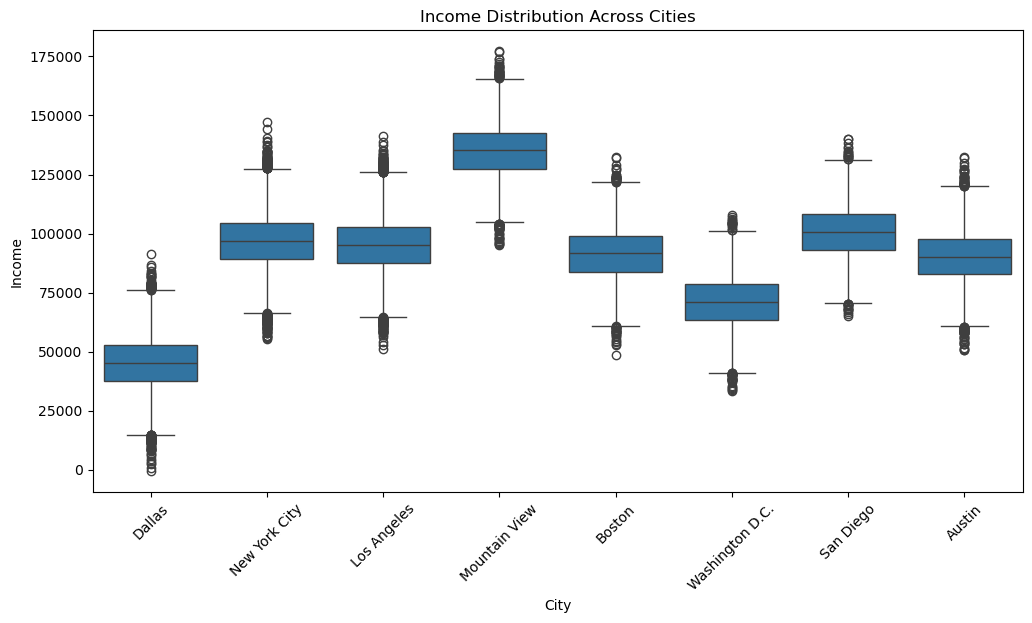

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='City', y='Income', data=df)
plt.title('Income Distribution Across Cities')
plt.xticks(rotation=45)
plt.show()

In [24]:
city_groups = [df[df['City'] == city]['Income'].sample(500, random_state=42) for city in df['City'].unique()]
normality_results = [stats.shapiro(group) for group in city_groups]


levene_test = stats.levene(*city_groups)

normality_results, levene_test

([ShapiroResult(statistic=0.9969504423280336, pvalue=0.4755434751801173),
  ShapiroResult(statistic=0.9966311683580437, pvalue=0.3818250242601857),
  ShapiroResult(statistic=0.9982889831010607, pvalue=0.9078877547219053),
  ShapiroResult(statistic=0.99526682487455, pvalue=0.1317684820893511),
  ShapiroResult(statistic=0.9969520901914861, pvalue=0.47606086504167994),
  ShapiroResult(statistic=0.9990427868792958, pvalue=0.9967756865475388),
  ShapiroResult(statistic=0.9979433087131397, pvalue=0.8120637638263799),
  ShapiroResult(statistic=0.9957488208793378, pvalue=0.1949226504281838)],
 LeveneResult(statistic=2.1943315949873736, pvalue=0.03187480240278164))

In [28]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


model = ols('Income ~ City', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2, robust='hc3')
anova_table

,sum_sq,df,F,PR(>F)
City,7.420395e+13,7.0,84687.224979,0.0
Residual,1.877497e+13,149992.0,NaN,NaN


TASK-4 Hypothesis Testing

In [30]:
import seaborn as sns
# Perform independent t-test on Income between Austin and Dallas
austin_income = df[df['City'] == 'Austin']['Income']
dallas_income = df[df['City'] == 'Dallas']['Income']



In [31]:

t_stat, p_value = stats.ttest_ind(austin_income, dallas_income, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.8f}")
if p_value < 0.05:
    print("✅ Result: Significant difference in Income between Austin and Dallas (Reject H₀)")
else:
    print("❌ Result: No significant difference in Income between Austin and Dallas (Fail to reject H₀)")


T-statistic: 352.93, P-value: 0.00000000
✅ Result: Significant difference in Income between Austin and Dallas (Reject H₀)


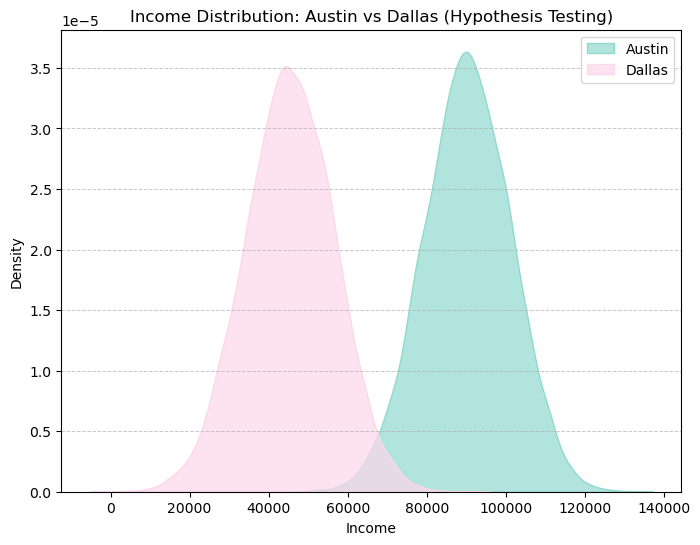

In [32]:

plt.figure(figsize=(8, 6))
sns.kdeplot(austin_income, fill=True, color='#91d9cf', label='Austin', alpha=0.7)
sns.kdeplot(dallas_income, fill=True, color='#fdd7eb', label='Dallas', alpha=0.7)

plt.title('Income Distribution: Austin vs Dallas (Hypothesis Testing)')
plt.xlabel('Income')
plt.ylabel('Density')
plt.legend()
plt.grid(axis='y', linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()

In [33]:

print(df['Income'].dtype)


invalid_income = df[pd.to_numeric(df['Income'], errors='coerce').isna()]
invalid_income.head()


float64


,Number,City,Gender,Age,Income,Illness


TASK-5  Principal Component Analysis

In [34]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



In [36]:
numeric_cols = ['Age', 'Income']
X = df[numeric_cols]

In [37]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [38]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [40]:

df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

In [41]:


pca.explained_variance_ratio_

array([0.50065906, 0.49934094])

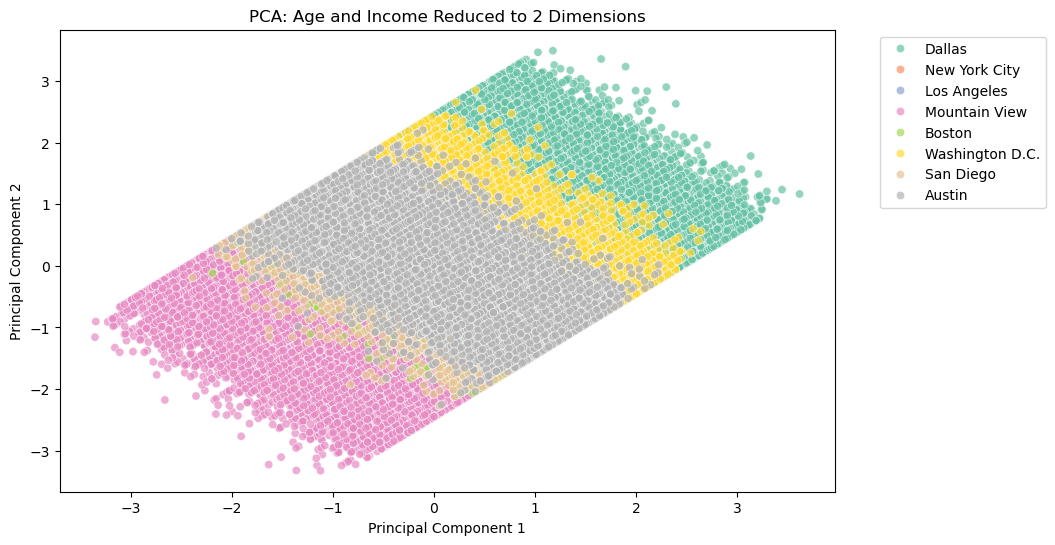

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='City', data=df, palette='Set2', alpha=0.7)
plt.title('PCA: Age and Income Reduced to 2 Dimensions')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()